In [ ]:
import nltk
print(nltk.__version__)

3.9.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv("F:\VS Code\Project\Resume Categorization\Resume.csv")
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17156\2526300383.py:1: SyntaxWarning: invalid escape sequence '\V'
  df=pd.read_csv("F:\VS Code\Project\Resume Categorization\Resume.csv")


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

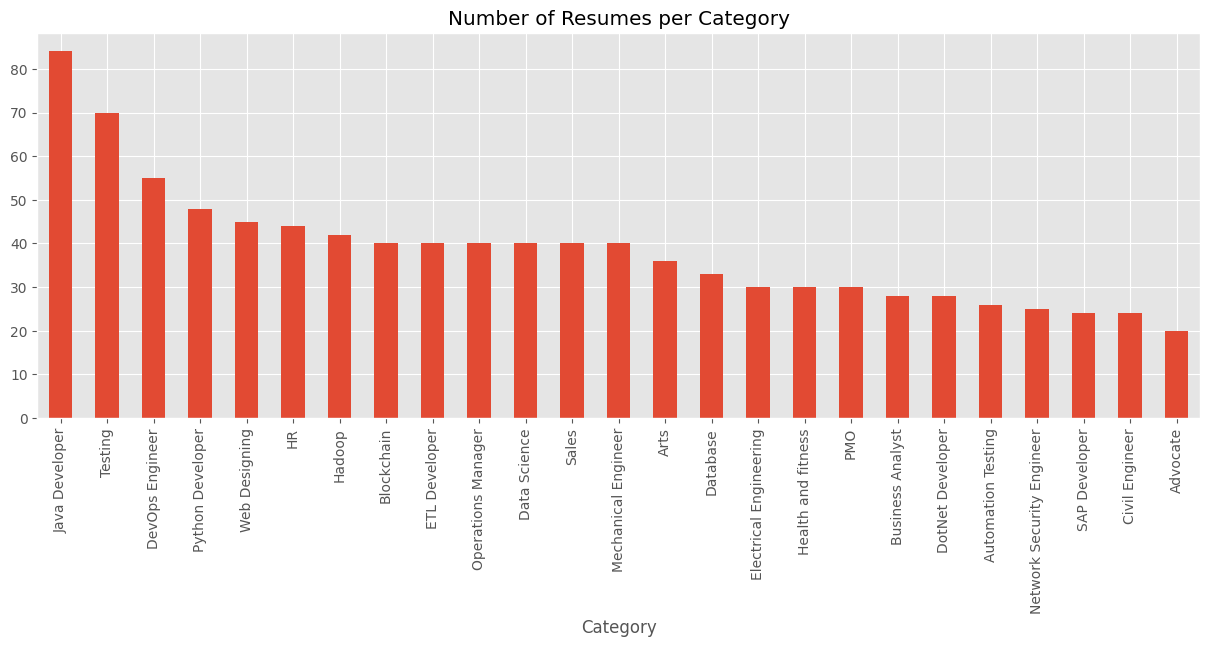

In [7]:
#Visualization

plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind='bar')
plt.title('Number of Resumes per Category')
plt.show()


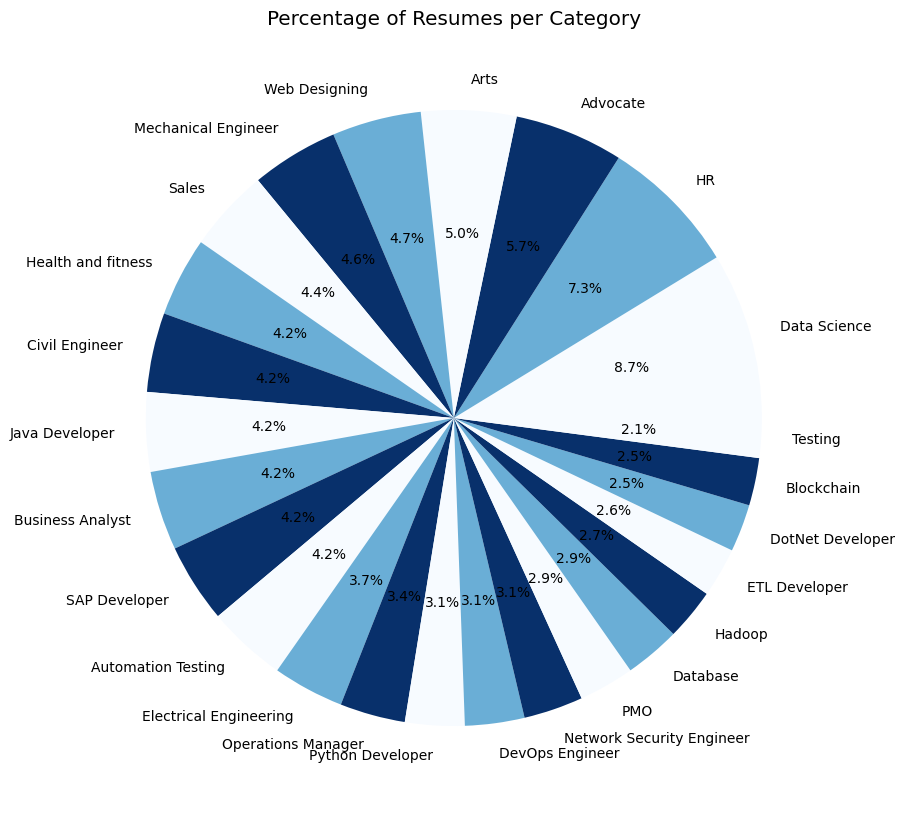

In [8]:
count=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(count,labels=labels,autopct='%1.1f%%', colors=plt.cm.Blues(np.linspace(0,1,3)))
plt.title('Percentage of Resumes per Category')
plt.show()


In [9]:
#Text cleaning

df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
#Remove URL,Email, etc..

def clean(txt):
  url_pattern=re.compile(r'https?://\S+www\.\S+')
  email_pattern=re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
  clean_txt=url_pattern.sub(r'',txt)
  clean_txt=email_pattern.sub(r'',txt)

  clean_txt=re.sub(r'[^\w\s]','',clean_txt)
  stop_words=set(stopwords.words('english'))
  clean_txt=' '.join([word for word in clean_txt.split() if word.lower() not in stop_words])
  return clean_txt

In [11]:
df['Resume']= df['Resume'].apply(lambda x:clean(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [12]:
le=LabelEncoder()
le.fit(df[['Category']])
df['Category']=le.transform(df['Category'])
df['Category']

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [13]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [14]:
tfidf=TfidfVectorizer()
tfidf.fit(df['Resume'])
resume=tfidf.transform(df['Resume'])

In [15]:

X_train,X_test,y_train,y_test=train_test_split(resume,df['Category'], test_size=0.2,random_state=42)

In [16]:
X_train.shape

(769, 8042)

In [17]:
X_test.shape

(193, 8042)

In [18]:
y_train.shape

(769,)

In [19]:
y_test.shape

(193,)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.9844559585492227


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [22]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

In [23]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.9844559585492227
Accuarcy of LogisticRegression on test data: 0.9948186528497409
Accuarcy of RandomForestClassifier on test data: 0.9948186528497409
Accuarcy of SVC on test data: 0.9948186528497409
Accuarcy of MultinomialNB on test data: 0.9792746113989638
Accuarcy of OneVsRestClassifier on test data: 0.9844559585492227


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
myresume='''Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run analytics generate reports Core member team helped developing automated review platform tool scratch assisting E discovery domain tool implements predictive coding topic modelling automating reviews resulting reduced labor costs time spent lawyers review Understand end end flow solution research development classification models predictive analysis mining information present text data Worked analyzing outputs precision monitoring entire tool TAR assists predictive coding topic modelling evidence following EY standards Developed classifier models order identify red flags fraudrelated issues Tools Technologies Python scikitlearn tfidf word2vec doc2vec cosine similarity NaÃve Bayes LDA NMF topic modelling Vader text blob sentiment analysis Matplot lib Tableau dashboard reporting MULTIPLE DATA SCIENCE ANALYTIC PROJECTS USA CLIENTS TEXT ANALYTICS MOTOR VEHICLE CUSTOMER REVIEW DATA Received customer feedback survey data past one year Performed sentiment Positive Negative Neutral time series analysis customer comments across 4 categories Created heat map terms survey category based frequency words Extracted Positive Negative words across Survey categories plotted Word cloud Created customized tableau dashboards effective reporting visualizations CHATBOT Developed user friendly chatbot one Products handle simple questions hours operation reservation options chat bot serves entire product related questions Giving overview tool via QA platform also give recommendation responses user question build chain relevant answer intelligence build pipeline questions per user requirement asks relevant recommended questions Tools Technologies Python Natural language processing NLTK spacy topic modelling Sentiment analysis Word Embedding scikitlearn JavaScriptJQuery SqlServer INFORMATION GOVERNANCE Organizations make informed decisions information store integrated Information Governance portfolio synthesizes intelligence across unstructured data sources facilitates action ensure organizations best positioned counter information risk Scan data multiple sources formats parse different file formats extract Meta data information push results indexing elastic search created customized interactive dashboards using kibana Preforming ROT Analysis data give information data helps identify content either Redundant Outdated Trivial Preforming fulltext search analysis elastic search predefined methods tag PII personally identifiable information social security numbers addresses names etc frequently targeted cyberattacks Tools Technologies Python Flask Elastic Search Kibana FRAUD ANALYTIC PLATFORM Fraud Analytics investigative platform review red flag cases â FAP Fraud Analytics investigative platform inbuilt case manager suite Analytics various ERP systems used clients interrogate Accounting systems identifying anomalies indicators fraud running advanced analytics Tools Technologies HTML JavaScript SqlServer JQuery CSS Bootstrap Nodejs D3js DCjs'''


In [26]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 May 2017 UITRGPV Da...
2,6,Areas Interest Deep Learning Control System De...
3,6,Skills â R â Python â SAP HANA â Tableau â SAP...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [27]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Data Science


In [28]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))